# Nama : Riska Ayu Ramadhani

# NIM  : 190411100116

# No. Whatsapp : 087817428067

Crawling adalah teknik pengumpulan data yang digunakan untuk mengindeks informasi pada halaman menggunakan URL (Uniform Resource Locator) dengan menyertakan API (Application Programming Interface) untuk melakukan penambangan dataset yang lebih besar.

# Crawling Data

# Install dan import scrapy

Melakukan Scrapy

Scrapy merupakan library python yang digunakan untuk melakukan scraping/ crawling data

In [1]:
!pip install scrapy

In [2]:
import scrapy
from scrapy.crawler import CrawlerProcess

# Scraping Web

In [3]:
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = []
    def _init_(self):
        df=pd.read_csv('crawlingweb.csv')
        for page in range(1,10):
            self.start_urls.append(url+str(page))
    def parse(self, response):
        for detail in response.css('a.gray.button::attr(href)'): 
            yield response.follow(detail.get(), callback = self.parse_detail)

    def parse_detail(self, response):
        for data in response.css('#content_journal > ul > li'):
            yield{
                'Judul': data.css('div:nth-child(2) > a::text').get(),
                'Penulis': data.css('div:nth-child(2) > span::text').get().replace('Penulis : ', ''),
                'Dospem 1': data.css('div:nth-child(3) > span::text').get().replace('Dosen Pembimbing I : ', ''),
                'Dospem 2': data.css('div:nth-child(4) > span::text').get().replace('Dosen Pembimbing II :', ''),
                'Abstraksi': data.css('div:nth-child(2) > p::text').get().replace('\n\n|\n','').replace('ABSTRAK', ''),
                'Abstraction': data.css('div:nth-child(4) > p::text').get().replace('\n\n|\n','').replace('ABSTRACT', ''),
                'Link Download': data.css('div:nth-child(5) > a:nth-child(1)::attr(href)').get().replace('.pdf-0.jpg', '.pdf'),
            }

# Melakukan Import Module

Terdapat beberapa library yang harus diimport terlebih dahulu.
- Numpy: NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing dan memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python. Keunggulan NumPy array dibandingkan dengan list pada Python adalah konsumsi memory yang lebih kecil serta runtime yang lebih cepat.

- Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. Pandas menyediakan struktur data dan fungsi high-level untuk membuat data lebih terstruktur, lebih cepat, mudah. Dalam pandas terdapat dua objek yang sering dibahas, yaitu DataFrame dan Series.

- matplotlib.pyplot adalah kumpulan fungsi yang membuat beberapa perubahan pada gambar. misalnya membuat gambar, membuat area plot dalam gambar, menambah label di plot dan lainnya. Biasanya untuk mempermudah secara umum matplotlib.pyplot disingkat menjadi plt import matplotlib.pyplot as plt

- Matplotlib adalah library Python yang fokus pada visualisasi data yang biasa difungsikan membuat plot grafik. matplotlib tersebut dipanggil dan dilakukan import style.

- Seaborn memiliki banyak fungsi untuk visualisasi data dan lebih mudah digunakan untuk menggunakan library seaborn kita harus install library ini terlebih dahulu dengan menggunakan PIP pip install seaborn Untuk menggunakannya import terlebih dahulu dengan perintah seperti ini import seaborn as sns.

In [53]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans

Melakukan Konfigurasi

set matplotlib ke inline dan menampilkan grafik di bawah sel yang sesuai.

In [5]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Persiapan Preprocessing

Preprocessing Data merupakan tahapan dalam melakukan mining data. Data Preprocessing atau praproses data biasanya dilakukan melalui cara eliminasi data yang tidak sesuai.

- Stopwords di nltk adalah kata yang paling umum dalam data. Itu adalah kata-kata yang tidak ingin digunakan untuk menggambarkan topik data dan telah ditentukan sebelumnya juga tidak dapat dihapus.

- Tokenization pada dasarnya mengacu pada pemisahan teks yang lebih besar menjadi baris yang lebih kecil, kata-kata atau bahkan membuat kata-kata untuk bahasa non-Inggris. 

In [6]:
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

In [7]:
# for named entity recognition (NER)
from nltk import ne_chunk

In [8]:
# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Melakukan instalasi nltk. Nltk (toolkit bahasa alami) adalah salah satu library python suite yang berisi program yang digunakan untuk melakukan pemrosesan bahasa statistik. 

In [9]:
!pip install nltk

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

# Menampilkan Dataset

Disini dilakukan proses untuk menampilkan data yang bernama crawlingweb.csv

In [12]:
df=pd.read_csv('crawlUAS.csv')

In [13]:
df.head()

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",Tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",PLN merupakan Badan Usaha Milik Negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",\r\n\r\nPenelitian ini bertujuan untuk mengeta...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...


Lakukan drop kolom pada judul, waktu dan kategori, karena yang akan diproses datanya disini adalah deskripsi.

In [14]:
# drop judul,penulis, dospem 1 & 2, Abstraction, dan link download
df.drop(['Judul', 'Penulis', 'Dospem 1', 'Dospem 2','Abstraction', 'Link Download'],axis=1,inplace=True)

In [15]:
df.head(26)

,Abstraksi
0,Abstrak\r\nPenelitian ini menggunakan metode k...
1,Aplikasi nyata pemanfaatan teknologi informasi...
2,Tujuan penelitian ini adalah untuk mengidentif...
3,PLN merupakan Badan Usaha Milik Negara yang be...
4,\r\n\r\nPenelitian ini bertujuan untuk mengeta...
5,Munculnya asumsi bahwa lahirnya budaya mengemi...
6,"Muhammad Sholeh, Pengaruh Iklan Di Televisi Te..."
7,Atribut produk memberikan pandangan atau gamba...
8,"Ulfiyatun Mutohharoh, “Analisis Faktor-faktor ..."
9,\r\nTujuan penelitian ini adalah untuk mengana...


# Cleaning Data

Salah satu preprocessing adalah melakukan cleaning data untuk melakukan proses pembersihan data yang tidak diperlukan. Dalam tahap ini, data dibersihkan melalui beberapa proses seperti mengisi nilai yang hilang, menghaluskan noisy data, dan menyelesaikan inkonsistensi yang ditemukan. Data juga bisa dibersihkan dengan dibagi menjadi segmen-segmen yang memiliki ukuran serupa lalu dihaluskan (binning).

Disini telah menggunakan lemmatizer dan juga dapat menggunakan stemmer. Juga kata-kata berhenti telah digunakan bersama dengan kata-kata yang panjangnya lebih pendek dari 3 karakter untuk mengurangi beberapa kata yang menyimpang. 

In [16]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

# Install dan import NLTK

In [17]:
!pip install nltk

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
# time taking
df['deskripsi_cleaned_text']=df['Abstraksi'].apply(clean_text)

In [20]:
df.head(30)

,Abstraksi,deskripsi_cleaned_text
0,Abstrak\r\nPenelitian ini menggunakan metode k...,Abstrak Penelitian menggunakan metode kuantita...
1,Aplikasi nyata pemanfaatan teknologi informasi...,Aplikasi nyata pemanfaatan teknologi informasi...
2,Tujuan penelitian ini adalah untuk mengidentif...,Tujuan penelitian adalah untuk mengidentifikas...
3,PLN merupakan Badan Usaha Milik Negara yang be...,merupakan Badan Usaha Milik Negara yang berger...
4,\r\n\r\nPenelitian ini bertujuan untuk mengeta...,Penelitian bertujuan untuk mengetahui pengaruh...
5,Munculnya asumsi bahwa lahirnya budaya mengemi...,Munculnya asumsi bahwa lahirnya budaya mengemi...
6,"Muhammad Sholeh, Pengaruh Iklan Di Televisi Te...",Muhammad Sholeh Pengaruh Iklan Televisi Terhad...
7,Atribut produk memberikan pandangan atau gamba...,Atribut produk memberikan pandangan atau gamba...
8,"Ulfiyatun Mutohharoh, “Analisis Faktor-faktor ...",Ulfiyatun Mutohharoh Analisis Faktor-faktor ya...
9,\r\nTujuan penelitian ini adalah untuk mengana...,Tujuan penelitian adalah untuk menganalisis at...


Drop kolom yang tidak diproses, yang akan didrop/ hapus adalah deskripsi

In [21]:
df.drop(['Abstraksi'],axis=1,inplace=True)

# Data Deskripsi_cleaned_text

Tampilkan data deskripsi_cleaned_text

In [22]:
df.head(30)

,deskripsi_cleaned_text
0,Abstrak Penelitian menggunakan metode kuantita...
1,Aplikasi nyata pemanfaatan teknologi informasi...
2,Tujuan penelitian adalah untuk mengidentifikas...
3,merupakan Badan Usaha Milik Negara yang berger...
4,Penelitian bertujuan untuk mengetahui pengaruh...
5,Munculnya asumsi bahwa lahirnya budaya mengemi...
6,Muhammad Sholeh Pengaruh Iklan Televisi Terhad...
7,Atribut produk memberikan pandangan atau gamba...
8,Ulfiyatun Mutohharoh Analisis Faktor-faktor ya...
9,Tujuan penelitian adalah untuk menganalisis at...


In [23]:
df['deskripsi_cleaned_text'][0]

'Abstrak Penelitian menggunakan metode kuantitatif yang menekankan pada pengujian hipotesis Variabel yang digunakan pada penelitian adalah kepemimpinan kompensasi Penelitian dilaksanakan Kantor Dinas Pendidikan Kabupaten Sampang sampel yang digunakan adalah sebanyak orang yang terdiri dari pegawai negeri sipil Hipotesis pertama menjelaskan bahwa variabel bebas secara bersama–sama mempunyai hubungan yang signifikan secara simultan antara kepemimpinan kompensasi terhadap kinerja pegawai terbukti dengan nilai Fhitung pada tingkat sebesar 11,645 dengan nilai sebesar 0,311 Hipotesis kedua menjelaskan bahwa variabel kompensasi sebagai variabel yang mempunyai pengaruh dominan terbukti dengan nilai hitung 3,072 berarti bahwa terdapat pengaruh positif signifikan secara parsial antara variabel bebas terhadap variabel terikat Kesimpulan penelitian adalah pengujian hipotesis pertama menunjukkan bahwa berdasarkan pengujian statistik secara simultan variabel bebas memiliki pengaruh yang signifikan t

# MENGEKSTRAKSI FITUR DAN MEMBUAT DOCUMENT-TERM-MATRIX ( DTM )

# $$
t f(t, d)=\log (1+\text { freq }(t, d))
$$

$$
t f(t, d)=\log (1+\text { freq }(t, d))
$$ 
<br>
<b>Keterangan:</b><br>
t : Term<br>
d : document<br>

$$
i d f(t, D)=\log \left(\frac{N}{\operatorname{count}(d \in D: t \in d)}\right)
$$
<br>

<b>Keterangan:</b><br>
N : total dokumen<br>

$$ 
(d \in D: t \in d) = \mathrm{df}_{t} 
$$ 

dft : jumlah kemunculan term (tj) dalam dokumen<br>


Sehingga, untuk TF-IDF rumusnya adalah sebagai berikut :

$$
t f i d f(t, d, D)=t f(t, d), i d f(t, D)
$$

Di DTM nilainya adalah nilai TFidf.

Saya juga telah menentukan beberapa parameter dari vectorizer TF-IDF.

Berikut poin penting pada LSA

1) LSA umumnya diimplementasikan dengan nilai TF-IDF dimana-mana dan bukan dengan Count Vectorizer.

2) max_features tergantung pada daya komputasi Anda dan juga pada eval. matrik (skor koherensi adalah matrik untuk model topik). Cobalah nilai yang memberikan eval terbaik. matrik dan tidak membatasi kekuatan pemrosesan.

3) Nilai default untuk min_df &max_df bekerja dengan baik.

4) Dapat mencoba nilai yang berbeda untuk ngram_range.

In [24]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [25]:
vect_text=vect.fit_transform(df['deskripsi_cleaned_text'])

Melihat kata-kata yang paling sering muncul dan langka di berita utama berdasarkan skor idf. Semakin kecil nilainya; lebih umum adalah kata dalam berita utama.

In [26]:
print(vect_text.shape)
print(vect_text)

(1019, 1000)
  (0, 467)	0.022635638327625874
  (0, 391)	0.02250178030957979
  (0, 122)	0.024709956136154426
  (0, 573)	0.047881691746207496
  (0, 536)	0.0815690546806959
  (0, 539)	0.049454663453802124
  (0, 889)	0.06982400165883748
  (0, 114)	0.033929390887651095
  (0, 566)	0.030163446648598238
  (0, 432)	0.0700652185554749
  (0, 935)	0.12399280391183405
  (0, 629)	0.03208302044532638
  (0, 732)	0.035790573500601434
  (0, 932)	0.05688763841434733
  (0, 112)	0.06074243442421942
  (0, 320)	0.07379075638406334
  (0, 243)	0.08694593454547808
  (0, 668)	0.07420444737000494
  (0, 821)	0.05079074567243407
  (0, 400)	0.14700047616227604
  (0, 7)	0.09074990080207347
  (0, 825)	0.06661492114827604
  (0, 950)	0.045912771911561526
  (0, 289)	0.06265431808451072
  (0, 597)	0.10445273238487683
  :	:
  (1018, 189)	0.031199481834644865
  (1018, 56)	0.041946309736188445
  (1018, 972)	0.012027939310659598
  (1018, 171)	0.029026739528994892
  (1018, 467)	0.012924654007991324
  (1018, 391)	0.012848222827

In [27]:
idf=vect.idf_

In [28]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['variabel'])
print(dd['kantor'])

penelitian need
1.298194652840868
4.431050344811837


c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Oleh karena itu, dapat dilihat bahwa berdasarkan nilai idf, 'anak' adalah kata yang paling sering terklihat. Sedangkan 'aliyah' paling jarang terlihat di antara berita lainnya.

# Tahap Topic Modelling LSA

Latent Semantic Analysis (LSA)

Latent Semantic Analysis (LSA), adalah salah satu teknik dasar dalam pemodelan topik. Ide intinya adalah mengambil matriks dari apa yang kita miliki - dokumen dan istilah - dan menguraikannya menjadi matriks topik dokumen dan matriks istilah topik yang terpisah.

Pendekatan pertama yang digunakan adalah LSA. LSA pada dasarnya adalah dekomposisi nilai tunggal.

SVD menguraikan DTM asli menjadi tiga matriks S=U.(sigma).(V.T). Di sini matriks U menunjukkan matriks dokumen-topik sementara (V) adalah matriks topik-term.

Setiap baris dari matriks U (matriks istilah dokumen) adalah representasi vektor dari dokumen yang sesuai. Panjang vektor ini adalah jumlah topik yang diinginkan. Representasi vektor untuk suku-suku dalam data kami dapat ditemukan dalam matriks V (matriks istilah-topik).

Jadi, SVD memberi kita vektor untuk setiap dokumen dan istilah dalam data kita. Panjang setiap vektor adalah k. Kami kemudian dapat menggunakan vektor-vektor ini untuk menemukan kata-kata dan dokumen serupa menggunakan metode kesamaan kosinus.

Kita dapat menggunakan fungsi truncatedSVD untuk mengimplementasikan LSA. Parameter n_components adalah jumlah topik yang ingin kita ekstrak. Model tersebut kemudian di fit dan ditransformasikan pada hasil yang diberikan oleh vectorizer.

Terakhir perhatikan bahwa LSA dan LSI (I untuk pengindeksan) adalah sama dan yang terakhir kadang-kadang digunakan dalam konteks pencarian informasi.

In [29]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=30, algorithm='randomized', n_iter=30, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [30]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.40229073  0.05549972  0.03121153 ...  0.04631198  0.04367907
   0.01158949]
 [ 0.16816737 -0.00672889  0.09201281 ... -0.04985049 -0.03141042
  -0.05278007]
 [ 0.18972676 -0.0473179   0.0910802  ... -0.0166461   0.02170044
   0.03666001]
 ...
 [ 0.26804609 -0.197341   -0.09325366 ... -0.0561457   0.02366674
   0.07551328]
 [ 0.32953475 -0.27080198 -0.14398106 ...  0.04039432  0.00970687
  -0.00538253]
 [ 0.22953822 -0.17968864 -0.08953121 ...  0.10554279 -0.03719869
  -0.02796514]]
(1019, 30)


In [31]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  40.229073130258335
Topic  1  :  5.5499720223277675
Topic  2  :  3.1211532951718617
Topic  3  :  -2.369895379520254
Topic  4  :  -18.642808040114783
Topic  5  :  -6.634079942029872
Topic  6  :  12.621155679089856
Topic  7  :  -13.692015383800646
Topic  8  :  -1.3531617247299534
Topic  9  :  -13.699701687139312
Topic  10  :  7.667117497825486
Topic  11  :  -0.7529514135939898
Topic  12  :  -5.5622626466129805
Topic  13  :  3.8776036951238955
Topic  14  :  7.378823408437847
Topic  15  :  5.922560007074962
Topic  16  :  -4.4638867955963955
Topic  17  :  -26.406002480024178
Topic  18  :  1.0536362594977564
Topic  19  :  7.321459571775766
Topic  20  :  -20.0599706018533
Topic  21  :  17.38276772186992
Topic  22  :  -1.2794847976840944
Topic  23  :  17.981624412983948
Topic  24  :  11.869272082138307
Topic  25  :  -3.552660962977302
Topic  26  :  -1.6318208134946635
Topic  27  :  4.631198356316799
Topic  28  :  4.367907305778705
Topic  29  :  1.158949342121136


Demikian pula untuk dokumen lain kita bisa melakukan proses tersebut. Namun perhatikan bahwa nilai tidak menambah 1 seperti di LSA itu bukan kemungkinan topik dalam dokumen.

In [32]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(30, 1000)
[[ 0.05154667  0.00835509  0.00626683 ...  0.00563758  0.00432133
   0.00748422]
 [ 0.04152337  0.00365113  0.00222593 ... -0.00605957 -0.00827659
  -0.0153578 ]
 [-0.01940661 -0.0040024  -0.00168403 ...  0.01488802 -0.0055252
  -0.01176884]
 ...
 [ 0.00291341 -0.0072706   0.00039339 ... -0.01013505  0.00030607
  -0.00503853]
 [ 0.00143063 -0.00356532 -0.00370652 ... -0.00129472 -0.04393956
  -0.00122227]
 [ 0.00985451  0.00747961 -0.00131466 ... -0.00015355 -0.02757589
   0.00139728]]


Pada proses ini mendapatkan daftar kata-kata penting untuk masing-masing dari 10 topik seperti yang ditunjukkan. Untuk proses tahapannya disini ditunjukkan 10 kata untuk setiap topik.

In [33]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
kerja karyawan terhadap yang kinerja variabel perusahaan penelitian berpengaruh sebesar 

Topic 1: 
kerja karyawan kinerja motivasi kepuasan disiplin lingkungan sebesar kompensasi organisasi 

Topic 2: 
keputusan pembelian produk merek konsumen kualitas promosi citra variabel mahasiswa 

Topic 3: 
ratio saham return equity harga debt earning share current kerja 

Topic 4: 
kerja kepuasan prestasi stres kualitas struktur produktivitas pelayanan perusahaan modal 

Topic 5: 
saham stock split harga volume sesudah sebelum perdagangan perbedaan yang 

Topic 6: 
kepuasan bank pelayanan pegawai pelanggan kualitas yang loan rasio empati 

Topic 7: 
bank rasio keuangan merek kerja kinerja karyawan ratio citra loan 

Topic 8: 
karyawan kepuasan kinerja pelayanan komitmen kualitas kompensasi pelanggan harga variabel 

Topic 9: 
merek kepuasan citra karyawan kualitas nilai sebesar 05 brand pelayanan 

Topic 10: 
merek pegawai kepemimpinan citra mahasiswa gaya organisasi trunojoyo univers

# Prepocessing

In [34]:
import pandas as pd

df= pd.read_csv("crawlUAS.csv")

df.head(30)

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",Tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",PLN merupakan Badan Usaha Milik Negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",\r\n\r\nPenelitian ini bertujuan untuk mengeta...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...
5,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Indah Permata Sari,"Dr. Hj. Iriani Ismail., Dra.,M.M","Faidal,SE., MM",Munculnya asumsi bahwa lahirnya budaya mengemi...,The emergence of the assumption that the birth...,https://pta.trunojoyo.ac.id/uploads/journals/0...
6,Pengaruh Iklan di televisi terhadap keputusan ...,Muhammad Sholeh,"Bambang Setiyo Pambudi, S.E,MM","Suyono, S.E.,M.S.M","Muhammad Sholeh, Pengaruh Iklan Di Televisi Te...","Muhammad Sholeh, The Effects of Television Adv...",https://pta.trunojoyo.ac.id/uploads/journals/0...
7,Pengaruh Atribut Produk Terhadap Keputusan Pem...,Nurus Sholehah,"Bambang Setiyo P., S.E,. MM.","Suyono S.E, M.S.M",Atribut produk memberikan pandangan atau gamba...,Product attributes provide a clear explanation...,https://pta.trunojoyo.ac.id/uploads/journals/0...
8,ANALISIS FAKTOR-FAKTOR YANG MENENTUKAN PREFERE...,ulfiyatun Mutohharoh,"Drs. Mohamad Tambrin, MM.","Yustina Chrismardani, S.Si, MM.","Ulfiyatun Mutohharoh, “Analisis Faktor-faktor ...","Ulfiyatun Mutohharoh, “The Factor Analysis on ...",https://pta.trunojoyo.ac.id/uploads/journals/0...
9,ANALISA KUALITAS PELAYANAN JASA UNTUK MENGUKUR...,Farid Ardyansyah,"Dr. H. Pribanus Wantara, Drs., MM","Hadi Purnomo, SE., MM",\r\nTujuan penelitian ini adalah untuk mengana...,\r\nThe purpose of this study was to analyze t...,https://pta.trunojoyo.ac.id/uploads/journals/1...


# Case Folding

In [35]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df['Abstraksi'] = df['Abstraksi'].str.lower()


print('Case Folding Result : \n')
print(df['Abstraksi'].head(20))
print('\n\n\n')

Case Folding Result : 

0     abstrak\r\npenelitian ini menggunakan metode k...
1     aplikasi nyata pemanfaatan teknologi informasi...
2     tujuan penelitian ini adalah untuk mengidentif...
3     pln merupakan badan usaha milik negara yang be...
4     \r\n\r\npenelitian ini bertujuan untuk mengeta...
5     munculnya asumsi bahwa lahirnya budaya mengemi...
6     muhammad sholeh, pengaruh iklan di televisi te...
7     atribut produk memberikan pandangan atau gamba...
8     ulfiyatun mutohharoh, “analisis faktor-faktor ...
9     \r\ntujuan penelitian ini adalah untuk mengana...
10    anissa novianti. 090211100010. pengaruh atribu...
11    devi kurniawati, pengaruh earning per share, n...
12    \r\ntujuan penelitian ini adalah (1) untuk men...
13    tujuan penelitian ini adalah untuk mengetahui ...
14    dwi suhardianto (2013), “pengaruh karakteristi...
15    farid,  pengaruh  periklanan di media televisi...
16    abstrak\r\n\r\npengaruh kecerdasan emosional t...
17    \r\n\r\npenelitian

# Tokenisasi

In [36]:
import string 
import re #regex library


# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Abstraksi'] = df['Abstraksi'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Abstraksi'] = df['Abstraksi'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Abstraksi'] = df['Abstraksi'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Abstraksi'] = df['Abstraksi'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Abstraksi'] = df['Abstraksi'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Abstraksi'] = df['Abstraksi'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['Abstraksi_tokens'] = df['Abstraksi'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['Abstraksi_tokens'].head(20))
print('\n\n\n')

Tokenizing Result : 

0     [abstrak, penelitian, ini, menggunakan, metode...
1     [aplikasi, nyata, pemanfaatan, teknologi, info...
2     [tujuan, penelitian, ini, adalah, untuk, mengi...
3     [pln, merupakan, badan, usaha, milik, negara, ...
4     [penelitian, ini, bertujuan, untuk, mengetahui...
5     [munculnya, asumsi, bahwa, lahirnya, budaya, m...
6     [muhammad, sholeh, pengaruh, iklan, di, televi...
7     [atribut, produk, memberikan, pandangan, atau,...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [tujuan, penelitian, ini, adalah, untuk, menga...
10    [anissa, novianti, pengaruh, atribut, produk, ...
11    [devi, kurniawati, pengaruh, earning, per, sha...
12    [tujuan, penelitian, ini, adalah, untuk, menge...
13    [tujuan, penelitian, ini, adalah, untuk, menge...
14    [dwi, suhardianto, pengaruh, karakteristik, in...
15    [farid, pengaruh, periklanan, di, media, telev...
16    [abstrak, pengaruh, kecerdasan, emosional, ter...
17    [penelitian, ini, be

# Menghitung Frekuensi Distribusi Token

In [37]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

df['Abstraksi_tokens_fdist'] = df['Abstraksi_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df['Abstraksi_tokens_fdist'].head(30).apply(lambda x : x.most_common()))

Frequency Tokens : 

0     [(variabel, 10), (yang, 8), (ini, 7), (hipotes...
1     [(dan, 8), (akademik, 8), (portal, 5), (kepuas...
2     [(menggunakan, 6), (persepsi, 6), (internet, 5...
3     [(yang, 7), (pln, 5), (penelitian, 5), (kerja,...
4     [(stressor, 9), (kerja, 6), (disiplin, 4), (ya...
5     [(yang, 13), (budaya, 9), (pengemis, 6), (yait...
6     [(pesan, 9), (terhadap, 6), (pengaruh, 5), (un...
7     [(produk, 20), (motor, 12), (yang, 8), (honda,...
8     [(yang, 16), (produk, 10), (online, 9), (fakto...
9     [(jembatan, 5), (suramadu, 5), (dan, 4), (peng...
10    [(kamal, 14), (dan, 10), (atribut, 8), (produk...
11    [(dan, 10), (yang, 7), (terhadap, 6), (harga, ...
12    [(pesan, 18), (dan, 6), (minat, 6), (beli, 6),...
13    [(yang, 14), (citra, 10), (image, 8), (penelit...
14    [(dan, 15), (yang, 13), (prestasi, 7), (kerja,...
15    [(pesan, 9), (pengaruh, 5), (yang, 5), (terhad...
16    [(kecerdasan, 8), (kerja, 7), (dan, 7), (prest...
17    [(merek, 9), (dan, 9)

# filtering (Stopword Removal)

*Stopword* merupakan hal yang tidak dilewatkan dalam *Pre-Processing*. *Stopword* sendiri memiliki fungsi untuk menghapuskan kata-kata yang dirasa kurang memiliki makna dalam sebuah kalimat, seperti contoh : dan, di, yang, dan masih banyak lainnya.

In [38]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("crawlUAS.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Abstraksi_tokens_WSW'] = df['Abstraksi_tokens'].apply(stopwords_removal) 


print(df['Abstraksi_tokens_WSW'].head(30))

0     [abstrak, penelitian, metode, kuantitatif, men...
1     [aplikasi, nyata, pemanfaatan, teknologi, info...
2     [tujuan, penelitian, mengidentifikasi, variabe...
3     [pln, badan, usaha, milik, negara, bergerak, b...
4     [penelitian, bertujuan, pengaruh, faktorfaktor...
5     [munculnya, asumsi, lahirnya, budaya, mengemis...
6     [muhammad, sholeh, pengaruh, iklan, televisi, ...
7     [atribut, produk, pandangan, gambaran, produk,...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [tujuan, penelitian, menganalisis, atribut, ku...
10    [anissa, novianti, pengaruh, atribut, produk, ...
11    [devi, kurniawati, pengaruh, earning, share, n...
12    [tujuan, penelitian, pengaruh, pesan, iklan, t...
13    [tujuan, penelitian, pengaruh, variabel, brand...
14    [dwi, suhardianto, pengaruh, karakteristik, in...
15    [farid, pengaruh, periklanan, media, televisi,...
16    [abstrak, pengaruh, kecerdasan, emosional, pre...
17    [penelitian, bertujuan, pengaruh, citra, m

# Normalization

In [39]:
normalizad_word = pd.read_csv("crawlUAS.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Abstraksi_normalized'] = df['Abstraksi_tokens'].apply(stopwords_removal) 


df['Abstraksi_normalized'].head(20)

0     [abstrak, penelitian, metode, kuantitatif, men...
1     [aplikasi, nyata, pemanfaatan, teknologi, info...
2     [tujuan, penelitian, mengidentifikasi, variabe...
3     [pln, badan, usaha, milik, negara, bergerak, b...
4     [penelitian, bertujuan, pengaruh, faktorfaktor...
5     [munculnya, asumsi, lahirnya, budaya, mengemis...
6     [muhammad, sholeh, pengaruh, iklan, televisi, ...
7     [atribut, produk, pandangan, gambaran, produk,...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [tujuan, penelitian, menganalisis, atribut, ku...
10    [anissa, novianti, pengaruh, atribut, produk, ...
11    [devi, kurniawati, pengaruh, earning, share, n...
12    [tujuan, penelitian, pengaruh, pesan, iklan, t...
13    [tujuan, penelitian, pengaruh, variabel, brand...
14    [dwi, suhardianto, pengaruh, karakteristik, in...
15    [farid, pengaruh, periklanan, media, televisi,...
16    [abstrak, pengaruh, kecerdasan, emosional, pre...
17    [penelitian, bertujuan, pengaruh, citra, m

# stemming

In [40]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Abstraksi_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Abstraksi_tokens_stemmed'] =df['Abstraksi_normalized'].swifter.apply(get_stemmed_term)
print(df['Abstraksi_tokens_stemmed'])

7548
------------------------
abstrak : abstrak
penelitian : teliti
metode : metode
kuantitatif : kuantitatif
menekankan : tekan
pengujian : uji
hipotesis : hipotesis
variabel : variabel
kepemimpinanx : kepemimpinanx
kompensasi : kompensasi
dilaksanakan : laksana
kantor : kantor
dinas : dinas
pendidikan : didik
kabupaten : kabupaten
sampang : sampang
sampel : sampel
orang : orang
pegawai : pegawai
negeri : negeri
sipil : sipil
non : non
pns : pns
bebas : bebas
bersamasama : bersamasama
hubungan : hubung
signifikan : signifikan
simultan : simultan
kepemimpinan : pimpin
kinerja : kerja
terbukti : bukti
nilai : nilai
fhitung : fhitung
tingkat : tingkat
pengaruh : pengaruh
dominan : dominan
hitung : hitung
positif : positif
parsial : parsial
terikat : ikat
kesimpulan : simpul
berdasarkan : dasar
statistik : statistik
memiliki : milik
membuktikan : bukti
berpengaruh : pengaruh
kunci : kunci
aplikasi : aplikasi
nyata : nyata
pemanfaatan : manfaat
teknologi : teknologi
informasi : informasi
k

Pandas Apply:   0%|          | 0/1019 [00:00<?, ?it/s]

0       [abstrak, teliti, metode, kuantitatif, tekan, ...
1       [aplikasi, nyata, manfaat, teknologi, informas...
2       [tuju, teliti, identifikasi, variabelvariabel,...
3       [pln, badan, usaha, milik, negara, gerak, bida...
4       [teliti, tuju, pengaruh, faktorfaktor, stres, ...
                              ...                        
1014    [umi, kholidah, pengaruh, arus, kas, operasi, ...
1015    [abstrak, ra, fajria, nurul, islami, pengaruh,...
1016    [riska, utami, ningsih, pengaruh, milik, insti...
1017    [dasar, hasil, teliti, nilai, square, besar, p...
1018    [laura, monica, analisis, pengaruh, likuiditas...
Name: Abstraksi_tokens_stemmed, Length: 1019, dtype: object


In [41]:
df.head()

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download,Abstraksi_tokens,Abstraksi_tokens_fdist,Abstraksi_tokens_WSW,Abstraksi_normalized,Abstraksi_tokens_stemmed
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",abstrak penelitian ini menggunakan metode kuan...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[abstrak, penelitian, ini, menggunakan, metode...","{'abstrak': 1, 'penelitian': 4, 'ini': 7, 'men...","[abstrak, penelitian, metode, kuantitatif, men...","[abstrak, penelitian, metode, kuantitatif, men...","[abstrak, teliti, metode, kuantitatif, tekan, ..."
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...,"[aplikasi, nyata, pemanfaatan, teknologi, info...","{'aplikasi': 1, 'nyata': 1, 'pemanfaatan': 1, ...","[aplikasi, nyata, pemanfaatan, teknologi, info...","[aplikasi, nyata, pemanfaatan, teknologi, info...","[aplikasi, nyata, manfaat, teknologi, informas..."
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[tujuan, penelitian, ini, adalah, untuk, mengi...","{'tujuan': 1, 'penelitian': 4, 'ini': 3, 'adal...","[tujuan, penelitian, mengidentifikasi, variabe...","[tujuan, penelitian, mengidentifikasi, variabe...","[tuju, teliti, identifikasi, variabelvariabel,..."
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",pln merupakan badan usaha milik negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[pln, merupakan, badan, usaha, milik, negara, ...","{'pln': 5, 'merupakan': 2, 'badan': 1, 'usaha'...","[pln, badan, usaha, milik, negara, bergerak, b...","[pln, badan, usaha, milik, negara, bergerak, b...","[pln, badan, usaha, milik, negara, gerak, bida..."
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",penelitian ini bertujuan untuk mengetahui peng...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[penelitian, ini, bertujuan, untuk, mengetahui...","{'penelitian': 2, 'ini': 1, 'bertujuan': 1, 'u...","[penelitian, bertujuan, pengaruh, faktorfaktor...","[penelitian, bertujuan, pengaruh, faktorfaktor...","[teliti, tuju, pengaruh, faktorfaktor, stres, ..."


In [47]:
vectorizer = TfidfVectorizer(stop_words='english')
berita = []
for data in df['Abstraksi_tokens_stemmed']:
    isi = ''
    for term in data:
        isi += term + ' '
    berita.append(isi)

vectorizer.fit(berita)

# Encode the Document
vector = vectorizer.transform(berita)

a= vectorizer.get_feature_names_out()

count = vector.toarray()
df = pd.DataFrame(data=count,columns = [a])

from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tf = tfidf.fit_transform(vectorizer.fit_transform(berita)).toarray()

dfp =pd.DataFrame(data=tf, index=list(range(1,len(tf[:,1])+1, )),columns=[a])
dfp

,aaa,aaaamanahsyariah,aar,abadi,abai,abalisis,abc,abcs,abd,abdul,...,zuhri,zuhruf,zulfi,zulia,zuliana,zulkifli,zulkiflimsi,zulpah,zy,zyn
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068607,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Reduksi Dimensi

In [48]:
from sklearn.decomposition import PCA
df_pca = pd.DataFrame()
# initialize PCA with 2 components
pca = PCA(n_components=3, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(df)
# save our two dimensions into x0 and x1
df_pca['x0']=pca_vecs[:, 1]
df_pca['x1']=pca_vecs[:, 2]

In [49]:
df_pca

,x0,x1
0,0.004258,0.011151
1,0.126413,0.002120
2,0.113655,-0.004355
3,0.001146,-0.019037
4,0.037205,0.017203
...,...,...
1014,-0.054622,-0.025717
1015,0.006044,0.009383
1016,-0.098473,-0.236287
1017,-0.174256,-0.438656


# Mencari Nilai k

In [54]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

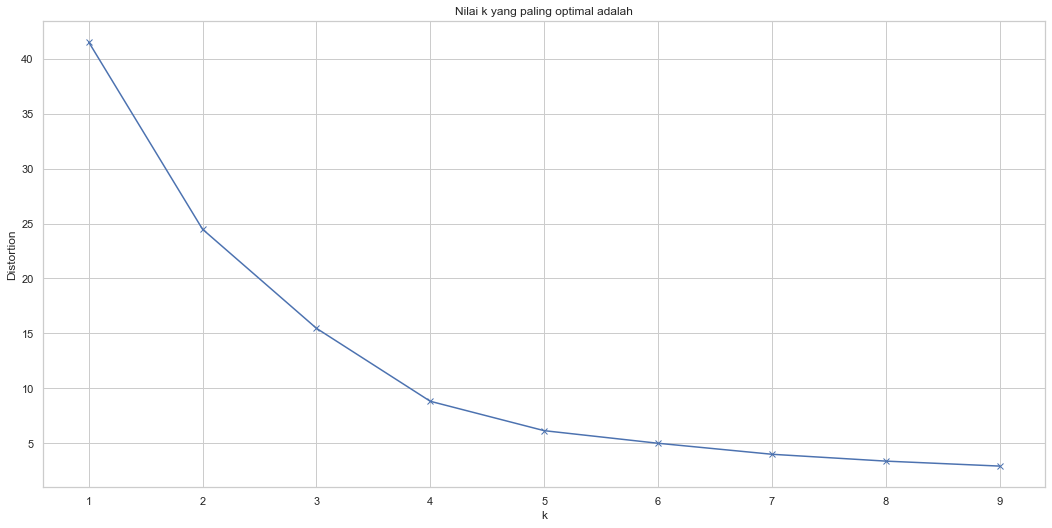

In [55]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Nilai k yang paling optimal adalah')
plt.show()

# Clustering

In [56]:
from sklearn.cluster import KMeans

# iinisisalisasi dengan 3 centroid
kmeans = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans.fit(dfp)
# memsukan klaster ke variable
clusters = kmeans.labels_
kmeans.labels_

array([0, 3, 3, ..., 2, 2, 2])

In [57]:
df_pca['cluster']=clusters
df_pca

,x0,x1,cluster
0,0.004258,0.011151,0
1,0.126413,0.002120,3
2,0.113655,-0.004355,3
3,0.001146,-0.019037,0
4,0.037205,0.017203,0
...,...,...,...
1014,-0.054622,-0.025717,2
1015,0.006044,0.009383,0
1016,-0.098473,-0.236287,2
1017,-0.174256,-0.438656,2


# Visualisasi K-Means Cluster

Untuk mempermudah mengetahui dan menganalisa hasil cluster dapat divisualisasikan seperti berikut ini.

Untuk visualisasinya sendiri menggunakan *Scatter Plot*

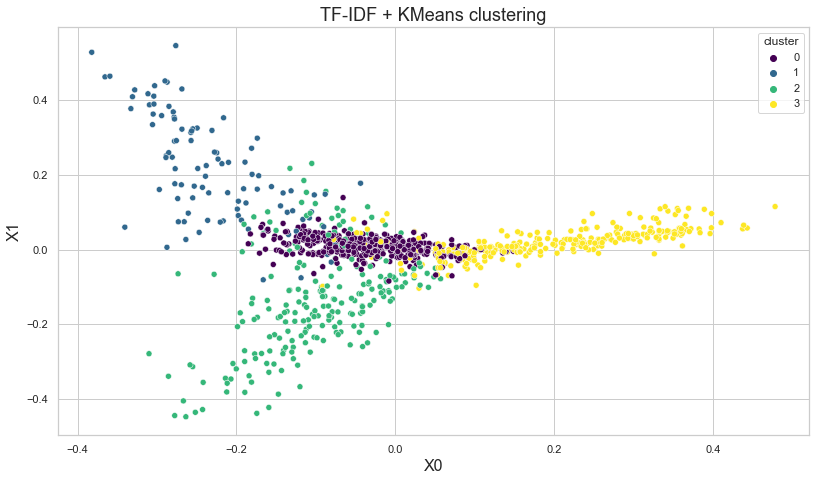

In [60]:
# m# map clusters to appropriate labels 
cluster_map = {0: 0, 1: 1, 2: 2,3:3}
# apply mapping
df_pca['cluster'] = df_pca['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_pca, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()